In [109]:
import pandas as pd
import altair as alt

potential_snl = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/full_data_snl_movies_coefficient.csv")
definitive_snl = potential_snl[potential_snl['movie_coefficient']>1]

In [110]:
potential_snl.shape

(4228, 15)

In [111]:
with open("/Users/estene/Documents/GitHub/snl_coefficient/data/snl_associated_media.txt", "r") as tf:
    snl_media = tf.read().split('\n')
definitive_snl = definitive_snl[~definitive_snl['imdb_link'].isin(snl_media)] # this removes the "SNL-associated" media
definitive_snl.shape

(176, 15)

In [112]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [113]:
# GENRES 
genres_count = definitive_snl.copy()
genres_count['genres'] = genres_count['genres'].apply(eval)
for idx, row in genres_count.iterrows():
    genres_count.at[idx, 'genres'] = "|".join(map(str,row.genres))

genres_count.head()
genres_count.to_csv("genres.csv", index=False)
genres_unique = tidy_split(genres_count, "genres", sep='|', keep=False)
genres_unique =  genres_unique.groupby(['genres']).size().reset_index(name="count")
genres_unique.sort_values(by='count', ascending=False, inplace=True)
genres_unique

bars = alt.Chart(genres_unique).mark_bar().encode(x='count',y=alt.Y('genres',sort='-x'))
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)

(bars + text).properties(height=900)

alt.LayerChart(...)

In [114]:
# MEDIA TYPE
media_count = definitive_snl.copy()
media_count['medium'] = media_count['medium'].apply(eval)
for idx, row in media_count.iterrows():
    media_count.at[idx, 'medium'] = "|".join(map(str,row.medium))

media_count.head()
media_unique = tidy_split(media_count, "medium", sep='|', keep=False)
media_unique = media_unique.groupby(['medium']).size().reset_index(name="count")
media_unique.sort_values(by='count', ascending=False, inplace=True)
media_unique

bars = alt.Chart(media_unique).mark_bar().encode(x='count',y=alt.Y('medium',sort='-x'))
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)

(bars + text).properties(height=900)

alt.LayerChart(...)

In [115]:
# ALUMS
alums_count = definitive_snl.copy()
alums_count['snl_alums'] = alums_count['snl_alums'].apply(eval)
for idx, row in alums_count.iterrows():
    alums_count.at[idx, 'snl_alums'] = "|".join(map(str,row.snl_alums))
#alums_count.head()
alums_unique = tidy_split(alums_count, "snl_alums", sep='|', keep=False)
#alums_unique.head()
alums_unique = alums_unique.groupby(['snl_alums']).size().reset_index(name="count")
alums_unique.sort_values(by='count', ascending=False, inplace=True)
alums_unique = alums_unique[alums_unique['count']>20]
alums_unique

bars = alt.Chart(alums_unique).mark_bar().encode(x='count',y=alt.Y('snl_alums',sort='-x'))
text = bars.mark_text(
    align='left',
   baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)

(bars + text).properties(height=900)

alt.LayerChart(...)

In [116]:
#FILMS BY DECADE 
films_by_decade = definitive_snl.copy()
films_by_decade['medium'] = films_by_decade['medium'].apply(eval)
for idx, row in films_by_decade.iterrows():
    films_by_decade.at[idx, 'medium'] = "|".join(map(str,row.medium))
    
films_by_decade = films_by_decade[films_by_decade['medium']=='Film']
films_by_decade['year_start'] = films_by_decade['year_start'].astype('string')
for idx, row in films_by_decade.iterrows():
    films_by_decade.at[idx, 'decade'] = row.year_start[:3] + '0s'
films_by_decade.head()

films_by_decade_unique = films_by_decade.groupby(['decade']).size().reset_index(name="count")

bars = alt.Chart(films_by_decade_unique).mark_bar().encode(x='decade',y='count')
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=0  # Nudges text to right so it doesn't appear on top of the bar - need to fix for this one. also tooltip?
).encode(
    text='count:Q'
)

(bars + text).properties(height=900)

alt.LayerChart(...)

In [117]:
# ALL MEDIA TYPES BY DECADE
media_by_decade = definitive_snl.copy()
media_by_decade['year_start'] = media_by_decade['year_start'].astype('string')
media_by_decade = media_by_decade.dropna(subset=['year_start'])
for idx, row in media_by_decade.iterrows():
    media_by_decade.at[idx, 'decade'] = row.year_start[:3] + '0s'
media_by_decade.head()

media_by_decade['medium'] = media_by_decade['medium'].apply(eval)
for idx, row in media_by_decade.iterrows():
    media_by_decade.at[idx, 'medium'] = "|".join(map(str,row.medium))

media_by_decade.head()

media_by_decade_unique = media_by_decade.groupby(['decade','medium']).size().reset_index(name="count")


# Create a stacked bar chart
alt.Chart(media_by_decade_unique).mark_bar(size=4).encode(
    
    # Year on the X axis
    x=alt.X('decade:N', axis=alt.Axis(format='c', title='Decade')),
    
    # Number of objects on the Y axis
    y=alt.Y('count:Q', title='Number of objects'),
    
    # Color according to the type
    color='medium:N',
    
    # Details on hover
    tooltip=[alt.Tooltip('medium:N', title='Medium'), alt.Tooltip('decade:N', title='Decade'), alt.Tooltip('count:Q', title='Count', format=',')]
).properties(width=700)


#media_by_decade_unique

alt.Chart(...)

In [118]:
# build a dataset of potential SNL movies where Lorne is an snl_alum OR broadway video is involved AND the coefficient is below 1
not_definitive = potential_snl[potential_snl['movie_coefficient']<1]
lorne_factor = not_definitive[not_definitive['snl_alums'].str.contains("Lorne Michaels")]
lorne_factor.shape

broadway_factor = not_definitive.dropna(subset=['production_companies'])
broadway_factor = broadway_factor[broadway_factor['production_companies'].str.contains("Broadway Video")]
broadway_factor.shape

(20, 15)

In [119]:
# Is the SNL effect strongest while the actors are still on the show? 
# films with the highest coefficient - are they during or post-snl 
# give Kate the people with the highest coefficients
# compare media to their show years - do things come out during or after their show? 

In [120]:
# use potential SNL for network graph
# make a dataset of adam and will ferrell projects
# how many projects exist between .9 and 1
future_snl = potential_snl[potential_snl['movie_coefficient']<1]
future_snl = future_snl[future_snl['movie_coefficient']>.9]
future_snl.shape
future_snl.head(26)

,imdb_link,movie_coefficient,title,media_type,credits_count,snl_alums,cast_count,genres,stars,num_episodes,principal_people,production_companies,medium,year_start,year_end
3918,https://www.imdb.com/title/tt5421678/,0.900256,22nd Annual Screen Actors Guild Awards,"['TV Special', '20162016', '1h 35m']",8,"['Bill Murray', 'Amy Poehler', 'Sarah Silverma...",8,['News'],"['Alicia Vikander', 'Kate Winslet', 'Nicole Ki...",0,"['Alan Carter', 'Dave Boone', 'Alicia Vikander...",NaN,['TV Special'],2016.0,2016.0
3919,https://www.imdb.com/title/tt0286409/,0.900623,2001 MTV Movie Awards,"['TV Special', '20012001']",7,"['Adam Sandler', 'Will Ferrell', 'David Spade'...",7,['Music'],"['Kirsten Dunst', 'Jimmy Fallon', 'Aaliyah', '...",0,"['Bruce Gowers', 'Joel Gallen', 'Mike Bender',...","['Music Television (MTV)', 'Tenth Planet Produ...",['TV Special'],2001.0,2001.0
3920,https://www.imdb.com/title/tt3444938/,0.902691,The Tonight Show Starring Jimmy Fallon,"['TV Series', '2014– 2014– ', 'TV-14TV-14', '1h']",101,"['Dan Aykroyd', 'Aidy Bryant', 'Horatio Sanz',...",80,"['Comedy', 'Music', 'Talk-Show']","['Jimmy Fallon', 'The Roots', 'Steve Higgins',...",1585,"['Jimmy Fallon', 'The Roots', 'Steve Higgins',...","['Broadway Video', 'Universal Television', '']",['TV Series'],2014.0,2014.0
3921,https://www.imdb.com/title/tt0275878/,0.909369,1992 MTV Movie Awards,"['TV Special', '19921992', '1h 30m']",7,"['Dana Carvey', 'Dennis Miller', 'Eddie Murphy...",7,['Family'],"['Dennis Miller', 'Christina Applegate', 'Arre...",0,"['Bruce Gowers', 'Michael Dugan', 'Dennis Mill...",NaN,['TV Special'],1992.0,1992.0
3922,https://www.imdb.com/title/tt0298810/,0.910687,The Concert for New York City,"['TV Special', '20012001', '4h 56m']",8,"['Paul Shaffer', 'Chris Kattan', 'Adam Sandler...",8,"['Documentary', 'Music']","['Nick Carter', 'Howie Dorough', 'Brian Littre...",0,"['Louis J. Horvitz', 'Woody Allen', 'Edward Bu...",NaN,['TV Special'],2001.0,2001.0
3923,https://www.imdb.com/title/tt1608290/,0.911870,Zoolander 2,"['20162016', 'PG-13PG-13', '1h 41m']",10,"['Drake Sather', 'Will Ferrell', 'Kyle Mooney'...",7,"['Action', 'Adventure', 'Comedy']","['Ben Stiller', 'Owen Wilson', 'Penélope Cruz'...",0,"['Ben Stiller', 'Justin Theroux', 'Ben Stiller...","['Panorama Films', 'Red Hour Films', 'Scott Ru...",['Film'],2016.0,2016.0
3924,https://www.imdb.com/title/tt3464668/,0.913747,2014 Golden Globe Arrivals Special,"['TV Special', '20142014']",5,"['Seth Meyers', 'Andy Samberg', 'Tina Fey', 'A...",5,['Talk-Show'],"['Matt Lauer', 'Savannah Guthrie', 'Carson Dal...",0,"['Gregg Gelfand', 'Ken Shapiro', 'Matt Lauer',...","['Dick Clark Productions', 'Hollywood Foreign ...",['TV Special'],2014.0,2014.0
3925,https://www.imdb.com/title/tt4779762/,0.919244,Detroiters,"['TV Series', '2017–20182017–2018', 'TV-14TV-1...",23,"['Nora Dunn', 'Lorne Michaels', 'Chris Redd', ...",15,['Comedy'],"['Sam Richardson', 'Tim Robinson', 'Pat Vern H...",20,"['Zach Kanin', 'Joe Kelly', 'Sam Richardson', ...","['Broadway Video', 'Central Productions', 'Com...",['TV Series'],2017.0,2018.0
3926,https://www.imdb.com/title/tt6343706/,0.919583,"Michael Bolton's Big, Sexy Valentine's Day Spe...","['TV Special', '20172017', 'TV-MATV-MA', '54m']",15,"['Janeane Garofalo', 'Andy Samberg', 'Chris Pa...",12,"['Comedy', 'Music', 'Musical']","['Michael Bolton', 'Sarah Shahi', 'Adam Scott'...",0,"['Scott Aukerman', 'Akiva Schaffer', 'Scott Au...","['Comedy Bang! Bang! Productions', 'Netflix', ...",['TV Special'],2017.0,2017.0
3927,https://www.imdb.com/title/tt5805752/,0.920505,Brigsby Bear,"['20172017', 'PG-13PG-13', '1h 37m']",10,"['Andy Samberg', 'Akiva Schaffer', 'Michaela W...",8,"['Comedy', 'Drama']","['Kyle Mooney', 'Jorge Lendeborg Jr.', 'Matt W...",0,"['Dave McCary', 'Kevin Costello', 'Kyle Mooney...","['3311 Productions', 'YL Pictures', 'Lord Mill...",['Film'],2017.0,2017.0


In [121]:
!pip install networkx==2.6.3
import networkx
!pip install decorator==5.0.9
import matplotlib.pyplot as plt

In [122]:
import pandas as pd 
import itertools 
import collections
from itertools import combinations 
    
networking = definitive_snl.copy()
networking['snl_alums'] = networking['snl_alums'].apply(eval)
pairs_list = []
for idx, row in networking.iterrows():
    snl_alums = row['snl_alums']
    snl_alums.sort()
    pairs = list(combinations(snl_alums, 2))
    for pair in pairs: 
        pairs_list.append(pair)
frequencyDict = collections.Counter(pairs_list)
pairs_frequency = pd.DataFrame.from_dict(frequencyDict, orient='index').reset_index()
pairs_frequency.rename(columns={'index':'relationship', 0:'count'}, inplace=True)
#pairs_frequency['relationship'] = pairs_frequency['relationship'].apply()
pairs_frequency['source'] = ''
pairs_frequency['target'] = ''
for idx, row in pairs_frequency.iterrows():
    pairs_frequency.at[idx,'relationship'] = list(row['relationship'])
    pairs_frequency.at[idx,'source'] = row['relationship'][0]
    pairs_frequency.at[idx,'target'] = row['relationship'][1]
#pairs_frequency[['source','target']] = pd.DataFrame(pairs_frequency.tolist(), index=pairs_frequency.index)
pairs_frequency
pairs_frequency.to_csv("data/pairs_frequency.csv", index=False)

In [123]:
import pandas as pd
alum_pairs = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/pairs_frequency.csv")
alum_pairs.columns.values
G = networkx.from_pandas_edgelist(alum_pairs, 'source', 'target', 'count')

In [124]:
networkx.write_graphml(G, 'GOT-network.graphml')

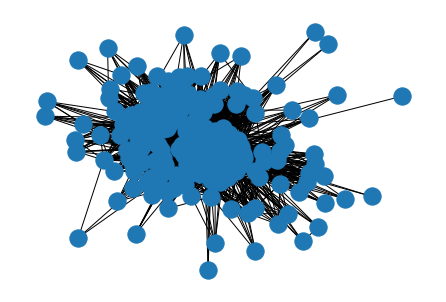

In [125]:
networkx.draw(G)

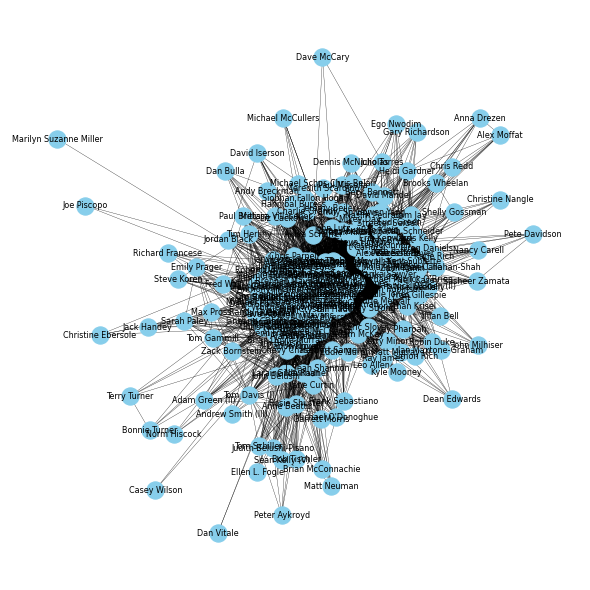

In [126]:
plt.figure(figsize=(8,8))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

In [127]:
networkx.degree(G)

DegreeView({'Adam Sandler': 126, 'Alan Zweibel': 120, 'Ben Stiller': 147, 'Bob Odenkirk': 134, 'Chris Rock': 132, "Conan O'Brien": 136, 'Gilda Radner': 49, 'Kevin Nealon': 105, 'Robert Downey Jr.': 96, 'Sarah Silverman': 149, 'Aidy Bryant': 87, 'Bobby Moynihan': 93, 'Kate McKinnon': 87, "Michael Patrick O'Brien": 69, "Michael Patrick O'Brien (II) ": 68, 'Pete Davidson': 7, 'Sasheer Zamata': 14, 'Vanessa Bayer': 64, 'Alex Moffat': 8, 'Anna Drezen': 8, 'Chris Redd': 13, 'Heidi Gardner': 26, 'Sam Jay': 48, 'Steve Higgins': 96, 'Sudi Green': 58, 'Andrew Smith (III)': 8, 'Dennis Miller': 98, 'Gilbert Gottfried': 114, 'Herbert Sargent': 34, 'Jan Hooks': 57, 'Laurie Metcalf': 66, 'Mike Myers': 113, 'Rob Schneider': 111, 'Bill Murray': 131, 'Dan Aykroyd': 125, 'Jane Curtin': 49, 'Molly Shannon': 128, 'Paul Shaffer': 119, 'Amy Poehler': 170, 'Billy Crystal': 108, 'Chevy Chase': 115, 'Chris Parnell': 114, 'Kristen Wiig': 145, 'Louis C.K.': 135, 'Tina Fey': 172, 'Tracy Morgan': 139, 'Alex Baze': 

In [128]:
# Who has the most number of connections in the network?
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df


,node,degree
83,Lorne Michaels,210
51,Fred Armisen,173
44,Tina Fey,172
38,Amy Poehler,170
88,Bill Hader,166
...,...,...
198,Dave McCary,3
161,Joe Piscopo,2
207,Casey Wilson,2
208,Dan Vitale,2


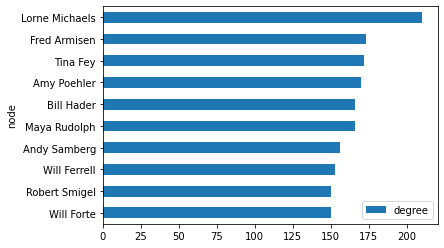

In [129]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()

In [130]:
# Who has the most number of connections in the network (if you factor in edge weight)?
networkx.degree(G, weight='Weight')
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

,node,weighted_degree
83,Lorne Michaels,210
51,Fred Armisen,173
44,Tina Fey,172
38,Amy Poehler,170
88,Bill Hader,166
...,...,...
198,Dave McCary,3
161,Joe Piscopo,2
207,Casey Wilson,2
208,Dan Vitale,2


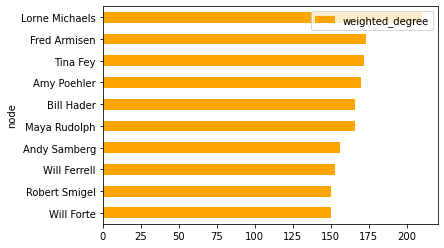

In [131]:
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh').invert_yaxis()

In [132]:
#Who connects the most other nodes in the network?
networkx.betweenness_centrality(G)
betweenness_centrality = networkx.betweenness_centrality(G)
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
83,Lorne Michaels,0.133773
51,Fred Armisen,0.029167
91,Maya Rudolph,0.021124
44,Tina Fey,0.020902
88,Bill Hader,0.020167
...,...,...
198,Dave McCary,0.000000
199,Matt Murray (I),0.000000
143,Gary Richardson,0.000000
201,Peter Aykroyd,0.000000


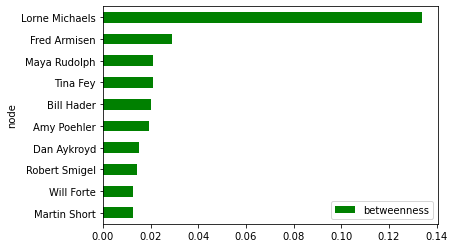

In [133]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

In [134]:
# Who forms distinct communities within this network?
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G)
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number
networkx.set_node_attributes(G, modularity_class, 'modularity_class')
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)
communities_df.to_csv("communities_df.csv")

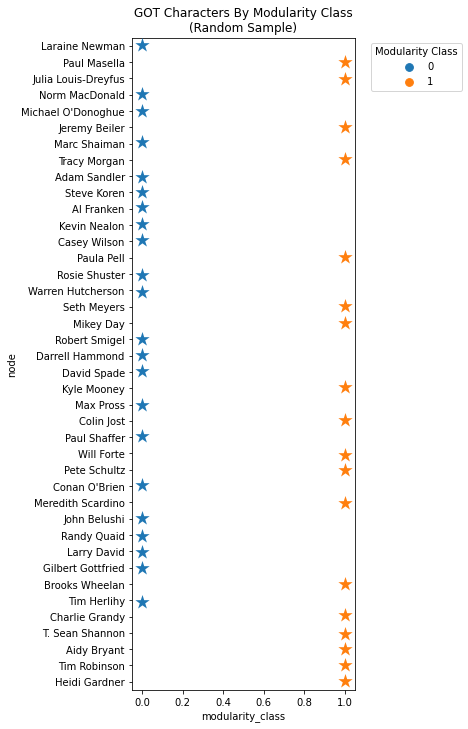

In [135]:
import seaborn as sns
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class\n(Random Sample)")
plt.show()

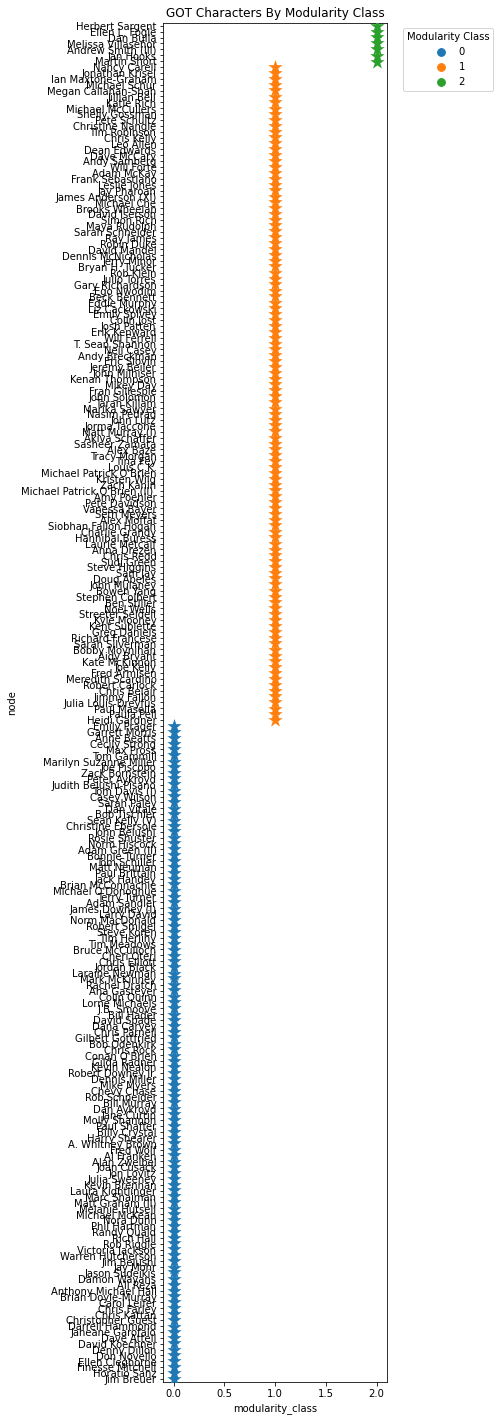

In [136]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class")
plt.show()

In [137]:
dict(G.nodes(data=True))
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df
nodes_df.sort_values(by='betweenness', ascending=False)

,degree,weighted_degree,betweenness,modularity_class
Lorne Michaels,210.0,210.0,0.133773,0.0
Fred Armisen,173.0,173.0,0.029167,1.0
Maya Rudolph,166.0,166.0,0.021124,1.0
Tina Fey,172.0,172.0,0.020902,1.0
Bill Hader,166.0,166.0,0.020167,0.0
...,...,...,...,...
Dave McCary,3.0,3.0,0.000000,1.0
Matt Murray (I),19.0,19.0,0.000000,1.0
Gary Richardson,11.0,11.0,0.000000,1.0
Peter Aykroyd,5.0,5.0,0.000000,0.0
